# Company-Level Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from glob import glob # This package helps us grab multiple files with similar conventions using a wildcard.
import os


# Pandas by default won't show too many variables so in order to work around
# this, we set up the following option
pd.set_option('display.max_columns', None) 

%matplotlib inline

In [7]:
%%time

# notice the wildcard * capturing all datasets in your folder "x_companies*.csv"
files = glob('~/Dropbox/Burning Glass/Analysis/company_data/x_companies_*.csv') 

# Create a list containing all of the datasets
dfs = [pd.read_csv(f, low_memory=False, parse_dates=['JobDate']) for f in files]

# Concatenate all of the datasets into one
df = pd.concat(dfs)

CPU times: user 30.9 s, sys: 14 s, total: 44.9 s
Wall time: 34min 56s


In [8]:
df.shape

(718629, 57)

In [9]:
sum(df.CanonYearsOfExperienceCanonLevel.isnull())

262279

In [10]:
df['CanonEmployer'].value_counts()

JP Morgan Chase Company                 180524
Bank of America                         147341
Chrysler                                 50950
PepsiCo Inc.                             50725
Citi                                     48002
Microsoft Corporation                    40372
General Motors                           30273
Facebook                                 26301
Google Inc.                              25195
Nestle USA Incorporated                  22627
Tyson Foods Incorporated                 21602
The Goldman Sachs Group, Inc.            18320
Morgan Stanley                           17870
Ford Motor Company                       10640
McKinsey & Company                        7999
Anheuser-Busch Companies, Inc.            5005
Twitter                                   4197
Yahoo                                     3764
Kraft Foods                               3172
Boston Consulting Group Incorporated      1178
Boston Consulting Group                   1126
Bain Company 

In [11]:
df1 = df.loc[df.CanonEmployer == "Microsoft Corporation"].copy()
df1.head()

,BGTOcc,BGTSubOcc,CIPCode,CanonCertification,CanonCity,CanonCountry,CanonCounty,CanonEmployer,CanonIntermediary,CanonJobHours,CanonJobTitle,CanonJobType,CanonMaximumDegree,CanonMinimumDegree,CanonOtherDegrees,CanonPostalCode,CanonPreferredDegrees,CanonRequiredDegrees,CanonSkillClusters,CanonSkills,CanonState,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,CleanJobTitle,ConsolidatedDegreeLevels,ConsolidatedInferredNAICS,ConsolidatedONET,ConsolidatedTitle,DivisionCode,Email,InternshipFlag,IsDuplicate,IsDuplicateOf,JobDate,JobDomain,JobID,JobReferenceID,JobText,JobURL,LMA,Language,Latitude,Longitude,MSA,MaxAnnualSalary,MaxDegreeLevel,MaxExperience,MaxHourlySalary,MinAnnualSalary,MinDegreeLevel,MinExperience,MinHourlySalary,PostingHTML,Source,StandardMajor,Telephone,YearsOfExperience
0,15-1199.95,Technical Project Manager,NaN,NaN,Redmond,USA,King,Microsoft Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98033,NaN,NaN,Customer and Client Support: Advanced Customer...,{'Customer Experience Improvement': 'Customer ...,WA,1-6,mid,Technical Advisor Manager,NaN,511210.0,15-119909,Technical Advisor/Manager,42644.0,NaN,0,False,NaN,2018-02-02,www.jobshark.com,38323730850,JS787_552254140,"Technical Advisor Manager\n\nRedmond, Washingt...",https://www.jobshark.com/us/en/search-jobs-in-...,DV534264|MT534266,en,47.6774,-122.1800,42660: Metropolitan Statistical Area|500: Comb...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Job Board,NaN,NaN,3 years
1,15-1199.95,Technical Project Manager,NaN,NaN,Chicago,USA,Cook,Microsoft Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60290,NaN,NaN,Customer and Client Support: Advanced Customer...,{'Customer Experience Improvement': 'Customer ...,IL,1-6,mid,Technical Advisor Manager,NaN,511210.0,15-119909,Technical Advisor/Manager,16974.0,NaN,0,False,NaN,2018-02-02,www.jobshark.com,38323730944,JS787_552242798,"Technical Advisor Manager\n\nChicago, Illinois...",https://www.jobshark.com/us/en/search-jobs-in-...,DV171697|MT171698,en,41.8746,-87.6373,16980: Metropolitan Statistical Area|176: Comb...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Job Board,NaN,NaN,3 years
2,15-1121.00,Systems Analyst,NaN,NaN,Salt Lake City,USA,Salt Lake,Microsoft Corporation,NaN,parttime,NaN,permanent,NaN,NaN,NaN,84101,NaN,NaN,Sales: Solution Sales Engineering;Specialized ...,{'Consultative Sales': 'Sales: Solution Sales ...,UT,0-1,low,Product Advisor,NaN,511210.0,15-112100,Product Advisor,NaN,NaN,0,False,NaN,2018-02-02,www.jobshark.com,38323735229,JS787_526464984,Product Advisor - City Creek Center\n\nSalt La...,https://www.jobshark.com/us/en/search-jobs-in-...,MT494162,en,40.7549,-111.8990,41620: Metropolitan Statistical Area,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Job Board,NaN,NaN,1+ year
3,15-1199.12,Document Control / Management Specialist,110701,NaN,Boston,USA,Suffolk,Microsoft Corporation,NaN,NaN,Acct Technician Strategist Edu,NaN,Master's,Bachelor's in Computer Science,NaN,2108,Master's,Bachelor's in Computer Science,Information Technology: Cloud Solutions;Specia...,{'Cloud Strategy': 'Information Technology: Cl...,MA,1-6,mid,Acct Technician Strategist Edu,16|18,511210.0,15-119912,Acct Technician Strategist Edu,71654.0,askstaff@microsoft.com,0,False,NaN,2018-02-02,careers.microsoft.com,38323765825,NaN,Are you looking to join a team that is focused...,https://careers.microsoft.com/jobdetails.aspx?...,DV257165|MT257165,en,42.3575,-71.0691,71650: Metropolitan NECTA|715: Combined NECTA,NaN,18.0,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,Computer Science,NaN,5+ years
4,13-1081.00,Logistician,NaN,NaN,King Of Prussia,USA,Montgomery,Microsoft Corporation,NaN,parttime,NaN,permanent,NaN,NaN,NaN,19406,NaN,NaN,Specialized Skills|Supply Chain and Logistics:...,"{'Detail-Oriented': 'Specialized Skills', 'Inv...",PA,0-1,low,Inventory Control Expert - Mall,NaN,511210.0,13-108100,Inventory Control Expert - Mall,33874.0,askstaff@microsoft.com,0,False,NaN,2018-02-02,careers.microsoft.com,38323765643,NaN,"Our Inventory Control Experts, also known as I...",https://careers.microsof

In [12]:
df1.shape

(40372, 57)

In [13]:
msft = df1.loc[:, ['JobDate', 'JobText', 'CleanJobTitle', 'CanonYearsOfExperienceLevel']]
msft.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel
0,2018-02-02,"Technical Advisor Manager\n\nRedmond, Washingt...",Technical Advisor Manager,mid
1,2018-02-02,"Technical Advisor Manager\n\nChicago, Illinois...",Technical Advisor Manager,mid
2,2018-02-02,Product Advisor - City Creek Center\n\nSalt La...,Product Advisor,low
3,2018-02-02,Are you looking to join a team that is focused...,Acct Technician Strategist Edu,mid
4,2018-02-02,"Our Inventory Control Experts, also known as I...",Inventory Control Expert - Mall,low


In [14]:
msft.shape

(40372, 4)

In [15]:
msft.JobDate.dt.year.value_counts()

2018    16772
2016    12908
2017    10692
Name: JobDate, dtype: int64

In [16]:
msft.isnull().any()

JobDate                        False
JobText                         True
CleanJobTitle                  False
CanonYearsOfExperienceLevel     True
dtype: bool

In [17]:
msft_2018 = msft[msft['JobDate'] > '2017-12-31'].copy()

In [18]:
msft_2018.isnull().any()

JobDate                        False
JobText                        False
CleanJobTitle                  False
CanonYearsOfExperienceLevel     True
dtype: bool

In [19]:
msft_2018['month'] = msft_2018.JobDate.dt.month
msft_2018['week'] = msft_2018.JobDate.dt.week
msft_2018.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week
0,2018-02-02,"Technical Advisor Manager\n\nRedmond, Washingt...",Technical Advisor Manager,mid,2,5
1,2018-02-02,"Technical Advisor Manager\n\nChicago, Illinois...",Technical Advisor Manager,mid,2,5
2,2018-02-02,Product Advisor - City Creek Center\n\nSalt La...,Product Advisor,low,2,5
3,2018-02-02,Are you looking to join a team that is focused...,Acct Technician Strategist Edu,mid,2,5
4,2018-02-02,"Our Inventory Control Experts, also known as I...",Inventory Control Expert - Mall,low,2,5


In [20]:
msft_2018_no_nan = msft_2018[msft_2018['CanonYearsOfExperienceLevel'].notna()].copy()

In [21]:
msft_2018_no_nan.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week
0,2018-02-02,"Technical Advisor Manager\n\nRedmond, Washingt...",Technical Advisor Manager,mid,2,5
1,2018-02-02,"Technical Advisor Manager\n\nChicago, Illinois...",Technical Advisor Manager,mid,2,5
2,2018-02-02,Product Advisor - City Creek Center\n\nSalt La...,Product Advisor,low,2,5
3,2018-02-02,Are you looking to join a team that is focused...,Acct Technician Strategist Edu,mid,2,5
4,2018-02-02,"Our Inventory Control Experts, also known as I...",Inventory Control Expert - Mall,low,2,5


In [22]:
import seaborn as sns

In [23]:
group_months = msft_2018_no_nan.groupby(['month', 'CanonYearsOfExperienceLevel'])

In [24]:
group_months.size()

month  CanonYearsOfExperienceLevel
1      high                           241
       low                             77
       mid                            417
2      high                           176
       low                             69
       mid                            352
3      high                           502
       low                             81
       mid                            762
       zero                             1
4      high                           466
       low                            117
       mid                            952
       zero                           109
5      high                           412
       low                            129
       mid                            588
6      high                           110
       low                             60
       mid                            218
       zero                             1
7      high                           388
       low                            112

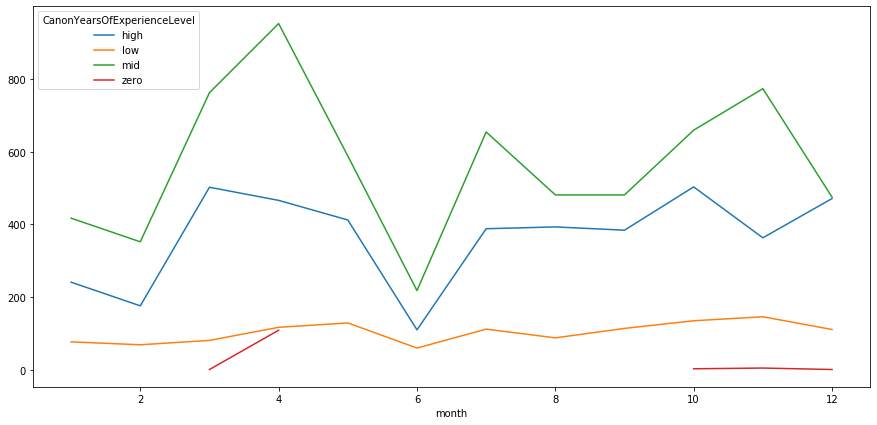

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
group_months.size().unstack().plot(ax=ax)

In [65]:
dummies = pd.get_dummies(msft_2018_no_nan['CanonYearsOfExperienceLevel'])
clean_dummy = msft_2018_no_nan.join(dummies)
clean_dummy.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week,high,low,mid,zero
0,2018-02-02,"Technical Advisor Manager\n\nRedmond, Washingt...",Technical Advisor Manager,mid,2,5,0,0,1,0
1,2018-02-02,"Technical Advisor Manager\n\nChicago, Illinois...",Technical Advisor Manager,mid,2,5,0,0,1,0
2,2018-02-02,Product Advisor - City Creek Center\n\nSalt La...,Product Advisor,low,2,5,0,1,0,0
3,2018-02-02,Are you looking to join a team that is focused...,Acct Technician Strategist Edu,mid,2,5,0,0,1,0
4,2018-02-02,"Our Inventory Control Experts, also known as I...",Inventory Control Expert - Mall,low,2,5,0,1,0,0


In [75]:
indexed_df = clean_dummy.set_index(['month', 'CanonYearsOfExperienceLevel']).sort_index()
indexed_df = indexed_df.loc[:,['high', 'low', 'mid', 'zero']].copy()
indexed_df.head()

high  low  mid  zero
month CanonYearsOfExperienceLevel                      
1     high                            1    0    0     0
      high                            1    0    0     0
      high                            1    0    0     0
      high                            1    0    0     0
      high                            1    0    0     0

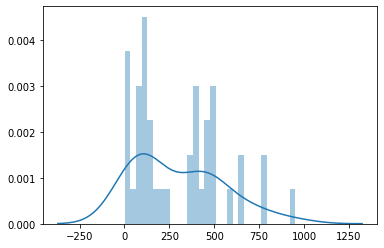

In [121]:
sns.distplot(msft_2018_no_nan.groupby(['month', 'CanonYearsOfExperienceLevel']).size(), bins=30)

## Text Preprocessing

In [26]:
import spacy
from spacy.lang.en import English
import en_core_web_sm
import nltk
from spacy import displacy
import random
from multiprocessing import Pool
stopwords = nltk.corpus.stopwords.words('english')

In [163]:
nlp = en_core_web_sm.load()

In [ ]:
displacy.render()
spacy.explain("")

In [27]:
small_msft_2018 = msft_2018.sample(frac=0.05, random_state=1)

clean_text = small_msft_2018.JobText.apply(lambda x : " ".join(word for word in x.split()
                                          if word not in stopwords))

In [165]:
small_msft_2018.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week
41309,2018-12-25,"Microsoft Logo\n\nSenior Data Analyst - Azure,...","Senior Data Analyst - Azure, Visual Studio & B...",high,12,52
48450,2018-04-19,1 30 true\n\nwww.dice.com uk.dice.com\n\nToggl...,Exchange Administrator C2C Or,mid,4,16
44202,2018-10-02,Microsoft Corporation \n \n ...,Cybersecurity Practice Manager,high,10,40
48550,2018-04-21,View All num of num Close (Esc)\n\nMicrosoft L...,Software Development Engineer II,mid,4,16
1858,2018-11-08,Construction Program Manager\n\nSave\n-Job num...,Construction Program Manager,mid,11,45


In [169]:
displacy.render(nlp(small_msft_2018.JobText.iloc[0][100:200]))

In [28]:
def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = nltk.word_tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stopwords]
    doc = ' '.join(filtered_tokens)
    return doc

In [29]:
normalize_corpus = np.vectorize(normalize_document)

In [30]:
norm_corpus = normalize_corpus(list(small_msft_2018['JobText']))
len(norm_corpus)

839

In [ ]:
norm_corpus[1]

In [32]:
norm_corpus.shape

(839,)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
tf = TfidfVectorizer(ngram_range=(1, 3),
                     min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(839, 85677)

In [35]:
doc_sim = cosine_similarity(tfidf_matrix)

In [36]:
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838
0,1.000000,0.050993,0.060359,0.268681,0.073510,0.045654,0.048649,0.102077,0.074477,0.086105,0.052359,0.041993,0.039869,0.054029,0.049941,0.184077,0.029387,0.018739,0.033174,0.268068,0.069282,0.043109,0.047730,0.039875,0.036266,0.028064,0.039164,0.085948,0.050809,0.075837,0.041732,0.056074,0.047565,0.040970,0.105531,0.041657,0.040722,0.040983,0.052778,0.200529,0.018817,0.036170,0.068336,0.039869,0.053192,0.072259,0.041779,0.047305,0.267104,0.051814,0.244636,0.081317,0.044445,0.042332,0.170067,0.238461,0.054666,0.048314,0.045668,0.042169,0.066784,0.051895,0.007431,0.044482,0.049404,0.071686,0.055356,0.093528,0.092888,0.052338,0.092109,0.082450,0.037494,0.085555,0.055058,0.127528,0.040465,0.070000,0.046932,0.090778,0.060613,0.047354,0.077840,0.06

In [37]:
position_list = small_msft_2018.CleanJobTitle.values
position_list[:5]

array(['Senior Data Analyst - Azure, Visual Studio & Business Applications',
       'Exchange Administrator C2C Or', 'Cybersecurity Practice Manager',
       'Software Development Engineer II', 'Construction Program Manager'],
      dtype=object)

In [38]:
position_idx = np.where(position_list == 'Software Development Engineer II')[0][0]

In [39]:
position_idx

3

## Clustering

### 1. KMeans

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [41]:
count_vect = CountVectorizer(ngram_range=(1, 3), # All the way up to trigram
                             min_df=0.13, # minimum frequency cut-off
                             max_df=0.80, # maximum frequency cut-off
                             stop_words=stopwords)

cv_matrix = count_vect.fit_transform(norm_corpus) 
cv_matrix.shape

(839, 798)

Microsoft probably has many more hierarchy than 7 so iterating through a variety of clusters would be ideal.

In [42]:
%%time

num_clusters = 7

km = KMeans(n_clusters=num_clusters,
            max_iter=10000, # reshuffle each centroid x number of times
            n_init=25, 
            random_state=42)

km.fit(cv_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [43]:
small_msft_2018['clusters'] = km.labels_
small_msft_2018.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week,clusters
41309,2018-12-25,"Microsoft Logo\n\nSenior Data Analyst - Azure,...","Senior Data Analyst - Azure, Visual Studio & B...",high,12,52,1
48450,2018-04-19,1 30 true\n\nwww.dice.com uk.dice.com\n\nToggl...,Exchange Administrator C2C Or,mid,4,16,3
44202,2018-10-02,Microsoft Corporation \n \n ...,Cybersecurity Practice Manager,high,10,40,5
48550,2018-04-21,View All num of num Close (Esc)\n\nMicrosoft L...,Software Development Engineer II,mid,4,16,1
1858,2018-11-08,Construction Program Manager\n\nSave\n-Job num...,Construction Program Manager,mid,11,45,5


In [44]:
from collections import Counter # to count data in each cluster

In [45]:
Counter(km.labels_) # data points per cluster

Counter({1: 304, 3: 88, 5: 126, 4: 79, 0: 118, 6: 31, 2: 93})

In [46]:
position_clusters = (small_msft_2018[['CleanJobTitle', 'clusters', 'month']]
                     .sort_values(by=['clusters'], ascending=False)
                     .groupby('clusters').head(20))

position_clusters = position_clusters.copy(deep=True)

In [47]:
feature_names = count_vect.get_feature_names() # names of the most common words
top_features = 20 # show us the top 20 features
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1] # sort the clusters in descending order

In [48]:
for cluster_num in range(num_clusters):
    key_features = [feature_names[index]
                    for index in ordered_centroids[cluster_num, :top_features]]
    positions = position_clusters[position_clusters['clusters'] == cluster_num]['CleanJobTitle'].values.tolist()
    print(f"Cluster # {str(cluster_num + 1)}")
    print("Key Features:", key_features)
    print("Positions:", positions)
    print("-" * 80)

Cluster # 1
Key Features: ['business', 'sales', 'customers', 'customer', 'solutions', 'services', 'partner', 'digital', 'drive', 'industry', 'teams', 'role', 'across', 'management', 'ability', 'solution', 'partners', 'marketing', 'protected', 'disability']
Positions: ['Global Black App Innovation Solutions Sales Specialist', 'Architect - Global Manufacturing Industry Services', 'Account Executive', 'Senior Human Resources Manager - Cloud And Ai Platform', 'Industry Program Manager, Financial Services, Ww Digital, Services & Success', 'Ww Intelligent Cloud Business - Partner Ecosystem', 'Human Resources Director', 'Operations Process Program Manager', 'Services Solutions Specialist - Digital Government Strategic Transformation Lead', 'Partner Development Manager', 'Services Sales Solutions Specialist - Azure', 'Senior Subsidiary Pmm, Smc', 'Regional Business Leader Government', 'Insights Analyst, Enterprise Services Operations, Ww Digital, Services & Success', 'Product Marketing Busines

### 2. Cosine Similarity

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
cos_sim_features = cosine_similarity(cv_matrix)

In [57]:
cos_sim_features

array([[1.        , 0.29955274, 0.40860995, ..., 0.15110738, 0.40586938,
        0.2844935 ],
       [0.29955274, 1.        , 0.14603076, ..., 0.27344578, 0.19120402,
        0.91607211],
       [0.40860995, 0.14603076, 1.        , ..., 0.07211913, 0.4986821 ,
        0.11682209],
       ...,
       [0.15110738, 0.27344578, 0.07211913, ..., 1.        , 0.10682822,
        0.26456019],
       [0.40586938, 0.19120402, 0.4986821 , ..., 0.10682822, 1.        ,
        0.15270625],
       [0.2844935 , 0.91607211, 0.11682209, ..., 0.26456019, 0.15270625,
        1.        ]])

In [51]:
km_cos = KMeans(n_clusters=num_clusters,
                max_iter=10000,
                n_init=50,
                random_state=42).fit(cos_sim_features)

In [52]:
Counter(km_cos.labels_)

Counter({0: 125, 4: 88, 3: 226, 2: 79, 5: 217, 1: 53, 6: 51})

In [53]:
small_msft_2018['cos_clusters'] = km_cos.labels_
small_msft_2018.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week,clusters,cos_clusters
41309,2018-12-25,"Microsoft Logo\n\nSenior Data Analyst - Azure,...","Senior Data Analyst - Azure, Visual Studio & B...",high,12,52,1,0
48450,2018-04-19,1 30 true\n\nwww.dice.com uk.dice.com\n\nToggl...,Exchange Administrator C2C Or,mid,4,16,3,4
44202,2018-10-02,Microsoft Corporation \n \n ...,Cybersecurity Practice Manager,high,10,40,5,3
48550,2018-04-21,View All num of num Close (Esc)\n\nMicrosoft L...,Software Development Engineer II,mid,4,16,1,0
1858,2018-11-08,Construction Program Manager\n\nSave\n-Job num...,Construction Program Manager,mid,11,45,5,0


In [54]:
pos_cos_clusters = (small_msft_2018[['CleanJobTitle', 'cos_clusters', 'month']]
                     .sort_values(by=['cos_clusters'], ascending=False)
                     .groupby('cos_clusters').head(20))

pos_cos_clusters = pos_cos_clusters.copy(deep=True)

In [55]:
for cluster_num in range(num_clusters):
    #key_features = [feature_names[index]
    #                for index in ordered_centroids[cluster_num, :top_features]]
    positions = pos_cos_clusters[pos_cos_clusters['cos_clusters'] == cluster_num]['CleanJobTitle'].values.tolist()
    print(f"Cluster # {str(cluster_num + 1)}")
    #print("Key Features:", key_features)
    print("Positions:", positions)
    print("-" * 80)

Cluster # 1
Positions: ['Iot Edge Solutions Architect Us', 'Program Manager - Sales Assistant Governance', 'Supportability Program Manager', 'Industry Solutions Executive', 'Customer Relationship Manager', 'Adoption And Change Management Consultant', 'Role Analysis Consultant', 'Sub Pmm Mod - Partner Marketing Manager', 'Senior Security Sde', 'Controls & Compliance Manager', 'Business Operations It Leader', 'Delivery Pursuit Lead', 'Insights Analyst, Enterprise Services Operations, Ww Digital, Services & Success', 'Partner Marketing Advisor', 'Corporate Affairs Manager', 'Solutions Specialist Ssp', 'Business Program Manager', 'Iot Edge Solutions Architect Us', 'Services Delivery Manager', 'Services Solutions Specialist - Digital Government Strategic Transformation Lead']
--------------------------------------------------------------------------------
Cluster # 2
Positions: ['Communications Specialist', 'Cook - Or', 'Senior Corporate Strategy & Development Manager', 'Marketing Communica

### 3. Affinity Propagation

Affinity propagation is based on the cocept of message passing, which means that it takes the similarity between word-pairs and assigns them to a cluster that it determines. The dataset is represented by a small number of examplars that act as representative samples of the dataset.

We do not need to set up a number of clusters as AP does it on its own. This can be good and bad at the same time as we can end up with too many or too few clusters coming from our dataset.

In [56]:
from sklearn.cluster import AffinityPropagation

In [58]:
ap = AffinityPropagation(max_iter=1000) # instantiate algorithm calss and set the max_iter parameter
ap.fit(cos_sim_features) # we can use different similarity measures
res = Counter(ap.labels_) # count the lables from the fitted model
res.most_common(10) # get the most common ones

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


[(-1, 839)]

In [59]:
small_msft_2018['aff_clusters'] = ap.labels_ # assign the labels to a column in our dataset
filt_aff_clusters = [i[0] for i in res.most_common(8)] # iterate and select the most common clusters
# get a dataframe filtered by the most common clusters
filtered_df = small_msft_2018[small_msft_2018['aff_clusters'].isin(filt_aff_clusters)]

In [60]:
filtered_df.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week,clusters,cos_clusters,aff_clusters
41309,2018-12-25,"Microsoft Logo\n\nSenior Data Analyst - Azure,...","Senior Data Analyst - Azure, Visual Studio & B...",high,12,52,1,0,-1
48450,2018-04-19,1 30 true\n\nwww.dice.com uk.dice.com\n\nToggl...,Exchange Administrator C2C Or,mid,4,16,3,4,-1
44202,2018-10-02,Microsoft Corporation \n \n ...,Cybersecurity Practice Manager,high,10,40,5,3,-1
48550,2018-04-21,View All num of num Close (Esc)\n\nMicrosoft L...,Software Development Engineer II,mid,4,16,1,0,-1
1858,2018-11-08,Construction Program Manager\n\nSave\n-Job num...,Construction Program Manager,mid,11,45,5,0,-1


In [61]:
# Aggregation method for showing clusters, .groupby() on the clusters
# and then show the top 20

aff_cos_clusters = (small_msft_2018[['CleanJobTitle', 'aff_clusters', 'month']] 
                     .sort_values(by=['aff_clusters'], ascending=False)
                     .groupby('aff_clusters').head(20))

aff_cos_clusters = aff_cos_clusters.copy(deep=True)

In [62]:
# The loop iterates over the most common clusters, and it then prints the most common
# job positions for each

for cluster_num in range(len(filt_aff_clusters)):
    
    positions = aff_cos_clusters[aff_cos_clusters['aff_clusters'] ==
                                 filt_aff_clusters[cluster_num]]['CleanJobTitle'].values.tolist()
    
    print(f"Cluster # {str(filt_aff_clusters[cluster_num])}")

    print("Positions:", positions)
    
    print("-" * 80)

Cluster # -1
Positions: ['Senior Data Analyst - Azure, Visual Studio & Business Applications', 'Digital Architect', 'Solutions Architect', 'Marketing Manager - Business Applications', 'Senior Business Strategy Manager, Industry Solutions', 'Solidworks Designer', 'Director Product Marketing', 'Principal Engineer', 'Project Manager', 'Senior Solutions Sales Manager', 'Executive Business Administrator', 'Technical Account Manager', 'Cloud Solutions Architect - Azure App Development', 'Dcs Principal Technical Program Manager', 'Principal Software Engineer', 'Solidworks Designer', 'Property Manager', 'Retail Partner Stores Specialist', 'Account Technology Strategist', 'Customer Program Manager']
--------------------------------------------------------------------------------


__Now build topic models on each cluster to see if you can find a better representation for the cluster__

### 4. Agglomerative Hierarchical Clustering

AHC is a bottom-up algorithm, which means we will start grouping positions from closest in similarity to furthest. This could be thought of as, engineers at different levels represented by different nodes of one collor, all the way up to the CEO of the company.

This algorithm takes two metrics, a distance and a linkage metric for assessing each datapoint. Think of this as grouping and then joining job positions.

In [63]:
from scipy.cluster.hierarchy import ward, dendrogram

In [64]:
# Function for our linkage metric

def ward_hier_cluster(feature_matrix):
    
    distance = 1 - cosine_similarity(feature_matrix)
    link_matrix = ward(distance)
    return link_matrix

In [91]:
def plot_hier_clusters(link_matrix, data, p=100, figure_size=(8, 12)):
    fig, ax = plt.subplots(figsize=figure_size)
    pos_titles = data['CleanJobTitle'].values.tolist()
    R = dendrogram(link_matrix, orientation="left", labels=pos_titles,
                   truncate_mode='lastp', p=p, no_plot=True)
    
    temp = {R["leaves"][i]: pos_titles[i] for i in range(len(R["leaves"]))}
    
    def llf(xx):
        return "{}".format(temp[xx])
    
    ax = dendrogram(
            link_matrix,
            truncate_mode='lastp',
            orientation='left',
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10
            )
    plt.tick_params(axis="x",
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off'
                    )
    plt.tight_layout()
    plt.title("Microsoft's Hierarchy Within Mid Level Jobs")
    plt.savefig('hierar_levels.png', dpi=400)

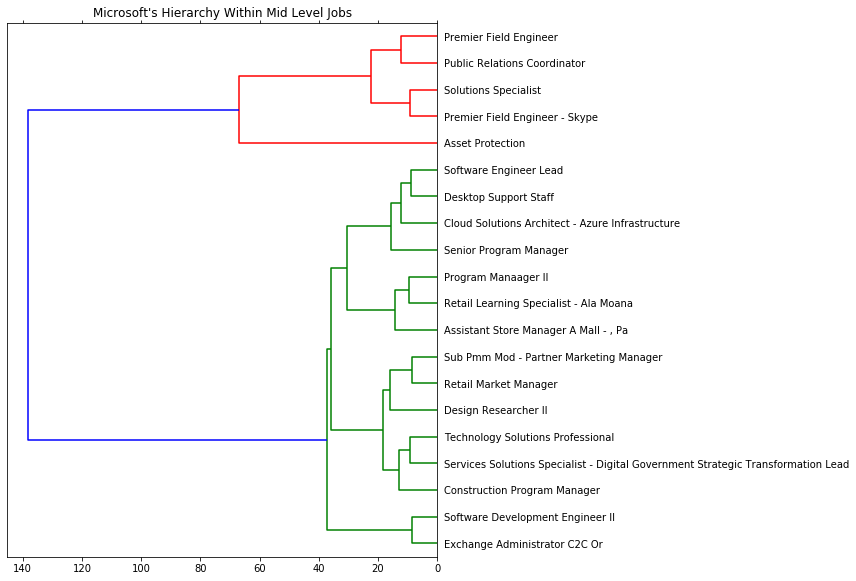

In [92]:
mask = (small_msft_2018['CanonYearsOfExperienceLevel'] == 'mid')
link_matrix = ward_hier_cluster(cv_matrix)
plot_hier_clusters(link_matrix, p=20, data=small_msft_2018[mask], figure_size=(12, 8));

## Topic Modeling

In [239]:
high_group = msft_2018[msft_2018['CanonYearsOfExperienceLevel'] == 'high'].copy()
high_group.head()

,JobDate,JobText,CleanJobTitle,CanonYearsOfExperienceLevel,month,week
6,2018-02-01,Services Sales Solution Specialist - AZURE\n\n...,Services Sales Solutions Specialist - Azure,high,2,5
17,2018-02-03,"The Territory Channel Manager Houston, TX\n\t...",Territory Channel Manager,high,2,5
21,2018-02-03,The Consumer and Device Sales (CDS) team is se...,Partner Sales Manager A Partner Lead,high,2,5
25,2018-02-01,Preferred location: Irvine or LA\n\t\n\tIndus...,Senior Industry Solutions Executive - Retail - Or,high,2,5
26,2018-02-01,Simplicity is the greatest sorcery.\n\t\n\tTak...,Senior Product Marketing Manager - Target Audi...,high,2,5


In [269]:
high_group['JobTextClean'] = high_group['JobText'].apply(lambda x : " ".join(word for word in x.split()
                                          if word not in stopwords))

In [240]:
high_group.shape

(4409, 6)

#### Clean JobText - high

In [244]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ramonperez/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [245]:
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

In [246]:
# Normailsing function for topic modeling
# This one is very similar to the one we used earlier

def normal_corpus(jobs):
    norm_jobs = []
    for job in jobs:
        job = job.lower()
        job_tokens = [token.strip() for token in wtk.tokenize(job)]
        job_tokens = [wnl.lemmatize(token) for token in job_tokens if not token.isnumeric()]
        job_tokens = [token for token in job_tokens if len(token) > 1]
        job_tokens = [token for token in job_tokens if token not in stopwords]
        job_tokens = list(filter(None, job_tokens))
        if job_tokens:
            norm_jobs.append(job_tokens)
            
    return norm_jobs

In [247]:
norm_jobs = normal_corpus(high_group['JobText'])
len(norm_jobs)

4409

In [268]:
print(norm_jobs[0])

['service', 'sale', 'solution', 'specialist', 'azure', 'microsoft', 'corporation', 'san', 'francisco', 'ca', 'usa', 'microsoft', 'enterprise', 'service', 'organization', 'dedicated', 'helping', 'customer', 'adapt', 'digitally', 'optimize', 'business', 'performance', 'enterprise', 'service', 'solution', 'specialist', 'sssp', 'play', 'key', 'part', 'strategic', 'advisor', 'microsofts', 'enterprise', 'customer', 'possessing', 'comprehensive', 'understanding', 'experience', 'azure', 'application', 'infrastructure', 'solution', 'challenge', 'customer', 'face', 'cloud', 'emerging', 'technology', 'enable', 'digital', 'transformation', 'organization', 'ability', 'develop', 'close', 'opportunity', 'deliver', 'azure', 'solution', 'key', 'role', 'offer', 'incredible', 'opportunity', 'accelerate', 'career', 'driving', 'business', 'impact', 'change', 'future', 'responsibility', 'ensure', 'holistic', 'customer', 'planning', 'increase', 'microsofts', 'share', 'wallet', 'azure', 'application', 'infras

In case you don't have gensim, please run the following command first.

```python
!pip3 install gensim
```

In [2]:
import gensim

In [253]:
bigram = gensim.models.Phrases(norm_jobs,
                               min_count=20, # ignore words and bigrams < 20 in corpus
                               threshold=20,
                               delimiter=b'_')

bigram_model = gensim.models.phrases.Phraser(bigram)

In [254]:
print(bigram_model[norm_jobs[0]][:30])

['service', 'sale', 'solution', 'specialist', 'azure', 'microsoft', 'corporation', 'san_francisco', 'ca', 'usa', 'microsoft', 'enterprise', 'service', 'organization', 'dedicated_helping', 'customer', 'adapt_digitally', 'optimize', 'business', 'performance', 'enterprise', 'service', 'solution', 'specialist_sssp', 'play', 'key', 'part', 'strategic', 'advisor', 'microsofts']


In [255]:
norm_jobs_bigrams = [bigram_model[doc] for doc in norm_jobs]

In [256]:
dictionary = gensim.corpora.Dictionary(norm_jobs_bigrams)

In [257]:
print(f"Word to # mapping: {list(dictionary.items())[:20]}")

Word to # mapping: [(0, 'ability'), (1, 'accelerate'), (2, 'account'), (3, 'achiever_achieve'), (4, 'adapt_digitally'), (5, 'add'), (6, 'advisor'), (7, 'advisory'), (8, 'ae'), (9, 'affiliation_protected'), (10, 'age_ancestry'), (11, 'aligned'), (12, 'alignment'), (13, 'applicant_receive'), (14, 'application'), (15, 'application_recruiting'), (16, 'approach'), (17, 'appropriate'), (18, 'apps_infra'), (19, 'apps_infrastructure')]


In [258]:
dictionary.filter_extremes(no_below=20, no_above=0.6)
print(f'Vocab Size: {len(dictionary)}')

Vocab Size: 5136


In [260]:
bow_jobs = [dictionary.doc2bow(text) for text in norm_jobs_bigrams]
print(bow_jobs[0][:30])

[(0, 4), (1, 8), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 7), (11, 1), (12, 1), (13, 2), (14, 4), (15, 1), (16, 14), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1)]


In [261]:
# terms and counts
print([dictionary[index] for index, freq in bow_jobs[0][:30]])

['accelerate', 'account', 'achiever_achieve', 'adapt_digitally', 'add', 'advisor', 'advisory', 'ae', 'aligned', 'alignment', 'application', 'approach', 'appropriate', 'apps_infra', 'apps_infrastructure', 'asset', 'azure', 'bachelor_degree', 'basic_qualification', 'bringing', 'ca', 'career', 'challenge', 'challenger', 'change', 'close', 'cloud', 'com', 'consistently_meeting', 'corporation']


### Latent Semantic Indexing

LSI correlates semantic meanings in our words and bigrams with all of the contents in our JobText variable. It uses Singular Value Decomposition and because similar terms tend to be used in similar context, we'll use it to see if there is a pattern showing hierarchy in high level jobs.  

Uses:
- Summarization
- Information Retrieval

In [262]:
%%time

topics = 5
lsi_bow = gensim.models.LsiModel(bow_jobs,
                                 id2word=dictionary,
                                 num_topics=topics,
                                 onepass=True,
                                 chunksize=len(bow_jobs),
                                 power_iters=1000)

CPU times: user 6min 5s, sys: 2.73 s, total: 6min 8s
Wall time: 1min 33s


In [263]:
for topic_id, topic in lsi_bow.print_topics(num_topics=5, num_words=25):
    print(f"Topic #{str(topic_id + 1)}:")
    print(topic)
    print()

Topic #1:
0.983*"nbsp" + 0.049*"middot" + 0.043*"sale" + 0.038*"rsquo" + 0.034*"cloud" + 0.029*"amp" + 0.029*"bull" + 0.027*"data" + 0.024*"design" + 0.024*"marketing" + 0.024*"project" + 0.020*"engineering" + 0.019*"new" + 0.019*"program" + 0.018*"azure" + 0.018*"global" + 0.018*"leadership" + 0.017*"strategic" + 0.017*"manager" + 0.016*"need" + 0.016*"knowledge" + 0.016*"impact" + 0.016*"leader" + 0.016*"job" + 0.016*"build"

Topic #2:
0.457*"dice" + 0.350*"cooky" + 0.327*"job" + 0.193*"com" + 0.191*"use" + 0.167*"site" + 0.142*"select" + 0.127*"apply" + 0.124*"search" + 0.111*"false" + 0.100*"data" + 0.100*"marketing" + 0.094*"sale" + -0.092*"nbsp" + 0.091*"project" + 0.087*"website" + 0.085*"account" + 0.082*"email" + 0.078*"www" + 0.075*"information" + 0.072*"third_party" + 0.072*"menu_browser" + 0.072*"please_enter" + 0.069*"location" + 0.068*"time"

Topic #3:
-0.437*"sale" + 0.235*"dice" + -0.199*"cloud" + 0.177*"cooky" + 0.131*"nbsp" + -0.119*"delivery" + -0.119*"enterprise" + 

- The higher the weight, the more important the contribution
- Sign indicates direction in vector space
- Dimensions = 5

In [264]:
for n in range(topics):
    print(f"Topic #{str(n + 1)}:")
    print('=' * 60)
    d1 = []
    d2 = []
    for term, wt in lsi_bow.show_topic(n, topn=25):
        if wt >= 0:
            d1.append((term, round(wt, 3)))
        else:
            d2.append((term, round(wt, 3)))
    
    print('Direction 1:', d1)
    print('-' * 60)
    print('Direction 2:', d2)
    print('-' * 60)

Topic #1:
Direction 1: [('nbsp', 0.983), ('middot', 0.049), ('sale', 0.043), ('rsquo', 0.038), ('cloud', 0.034), ('amp', 0.029), ('bull', 0.029), ('data', 0.027), ('design', 0.024), ('marketing', 0.024), ('project', 0.024), ('engineering', 0.02), ('new', 0.019), ('program', 0.019), ('azure', 0.018), ('global', 0.018), ('leadership', 0.018), ('strategic', 0.017), ('manager', 0.017), ('need', 0.016), ('knowledge', 0.016), ('impact', 0.016), ('leader', 0.016), ('job', 0.016), ('build', 0.016)]
------------------------------------------------------------
Direction 2: []
------------------------------------------------------------
Topic #2:
Direction 1: [('dice', 0.457), ('cooky', 0.35), ('job', 0.327), ('com', 0.193), ('use', 0.191), ('site', 0.167), ('select', 0.142), ('apply', 0.127), ('search', 0.124), ('false', 0.111), ('data', 0.1), ('marketing', 0.1), ('sale', 0.094), ('project', 0.091), ('website', 0.087), ('account', 0.085), ('email', 0.082), ('www', 0.078), ('information', 0.075),

In [265]:
term_topic = lsi_bow.projection.u
singular_values = lsi_bow.projection.s
topic_document = (gensim.matutils.corpus2dense(lsi_bow[bow_jobs],
                                               len(singular_values)).T / singular_values).T
term_topic.shape, singular_values.shape, topic_document.shape

((5136, 5), (5,), (5, 4409))

In [267]:
jobs_topics = pd.DataFrame(np.round(topic_document.T, 3),
                          columns=['T' + str(i) for i in range(1, topics + 1)])
jobs_topics.head()

,T1,T2,T3,T4,T5
0,0.001,0.005,-0.019,0.015,-0.014
1,0.001,0.003,-0.012,0.014,0.000
2,0.001,0.004,-0.017,0.014,0.007
3,0.001,0.004,-0.016,0.014,-0.003
4,0.001,0.002,-0.005,-0.004,-0.001


In [270]:
# Pick random jobs and place them in the list below. The loop will iterate through
# the topics and give you, according the LSI and the parameters we choose, which topic
# group each job belongs to

random_jobs = [52, 1000, 2170]

for job_num in random_jobs:
    top_topics = list(jobs_topics.columns[np.argsort(
                                          -np.absolute(jobs_topics.iloc[job_num].values))[:3]])
    print(f"Job # {str(job_num)}:")
    print(f"Dominant Jobs: {top_topics}")
    print(f"Job Summary:")
    print(high_group['JobTextClean'][job_num][:400])
    print()

Job # 52:
Dominant Jobs: ['T1', 'T5', 'T4']
Job Summary:
Are passionate building cool devices technologies? The Surface Team focuses building devices fully express Windows vision. A fundamental part strategy desirable powerful devices enable experiences people want elicit excitement. Creating devices involves close partnership hardware software engineers, designers, manufacturing. We currently building next generation products Surface needs you! We seek

Job # 1000:
Dominant Jobs: ['T5', 'T4', 'T3']
Job Summary:
8 hours 2018-03-142018-04-13 Associate Architect - CRM Dynamics Microsoft Corporation Redmond, WA Add Favorites Share Job Apply Now * Job Code 23795-1083957##2340#RedmondWA Description Microsoft Services' mission lead serve Microsoft's customers partners realize full potential Microsoft software services. Microsoft Services partners bring deepest expertise Microsoft solutionsfrom enterprise planni

Job # 2170:
Dominant Jobs: ['T3', 'T4', 'T5']
Job Summary:
14 hours 2018-05-1620

### Next Steps

1. Do topic modelling on every level (high, mid, and low), get at least 3 to 5 levels
2. Evaluate those topics and add them as tags to an NLP pipeline using spacy
3. Create labels with (maybe) a threshold for the frequency of such tags or the proportion of the tags to those found in all job adds, per level and within that year
4. (Optional) create tags with prodigy and use any type of classifier to separate or identify the hierarchy of a company
5. Create labels for those instances for which you have position labels. Split them by industry, benchmark it against the proportion of job posts per position_level category.
6. Test this over and over and come up with labels for a classification algorithm to determine the hierarchy of a company